### Importando os Pacotes Utilitários

In [1]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.xception import Xception
from sklearn.model_selection import train_test_split
from distutils.dir_util import copy_tree
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import tarfile, os
import numpy as np
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Baixando os Conjuntos de Dados do Servidor

In [3]:
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/CheXpert-v1.0-small.zip', 
                      extract_dir = '/content/CheXpert-v1.0-small', format = 'zip')
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/vinbigdata.zip', 
                      extract_dir = '/content/vinbigdata/', format = 'zip')
shutil.unpack_archive(filename = '/content/drive/MyDrive/datasets-lung-loc/images.zip', 
                      extract_dir = '/content/images/', format = 'zip')

### Organizando e Analisando os Dados

Text(0, 0.5, 'Imagens')

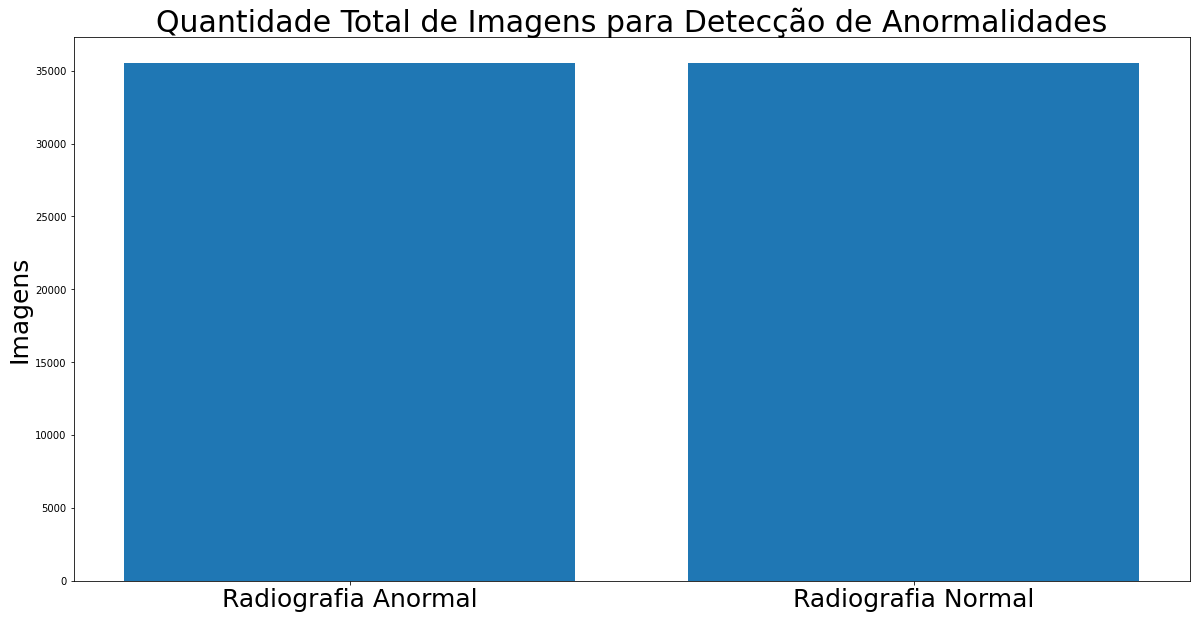

In [5]:
dataset = pd.read_csv('/content/dataset_ab_detection.csv', index_col = 0)

count_findings = list()
count_findings.append(dict(dataset['Abnormal'].value_counts())[1.0])
count_findings.append(dict(dataset['Abnormal'].value_counts())[0.0])

plt.figure(figsize = (20, 10))
plt.bar(['Radiografia Anormal', 'Radiografia Normal'], count_findings)
plt.xticks(rotation = 0, size = 25)
plt.title('Quantidade Total de Imagens para Detecção de Anormalidades', size = 30)
plt.ylabel('Imagens', size = 25)

In [6]:
f_train, f_val = train_test_split(dataset, test_size = 0.15, random_state = 42, 
                                  stratify = dataset['Abnormal'])
f_val, f_test = train_test_split(f_val, test_size = 0.5, random_state = 42, 
                                 stratify = f_val['Abnormal'])

Text(0, 0.5, 'Imagens')

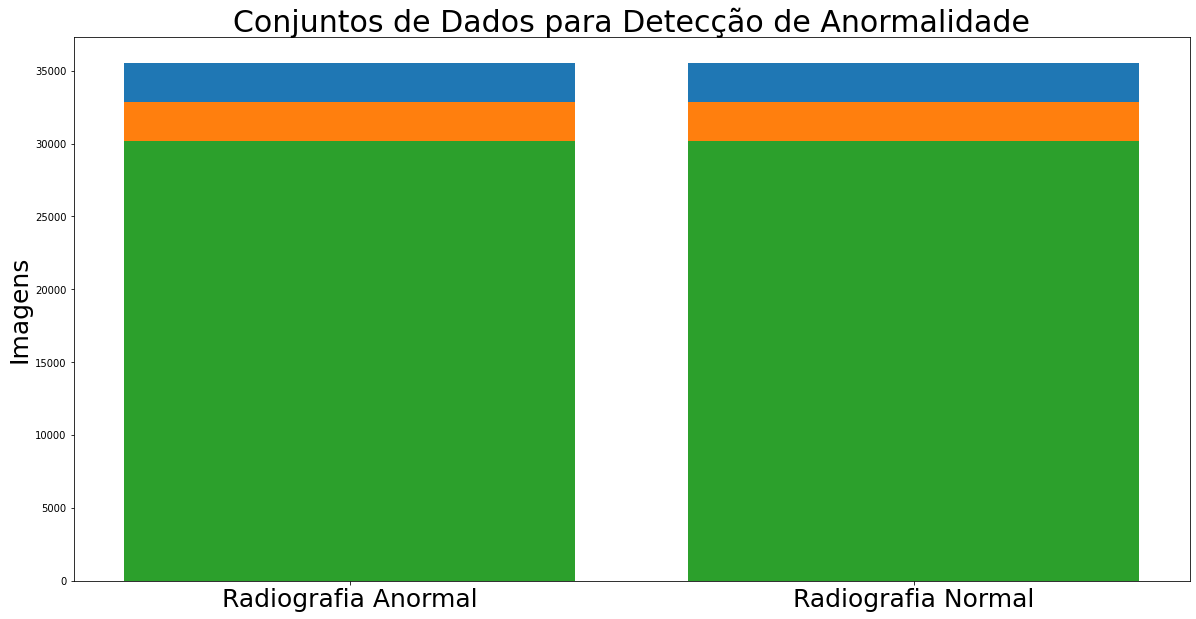

In [7]:
count_train, count_val, count_test = [], [], []
count_train.append(dict(f_train['Abnormal'].value_counts())[1.0])
count_train.append(dict(f_train['Abnormal'].value_counts())[0.0])
count_val.append(dict(f_val['Abnormal'].value_counts())[1.0])
count_val.append(dict(f_val['Abnormal'].value_counts())[0.0])
count_test.append(dict(f_test['Abnormal'].value_counts())[1.0])
count_test.append(dict(f_test['Abnormal'].value_counts())[0.0])

plt.figure(figsize = (20, 10))
plt.bar(['Radiografia Anormal', 'Radiografia Normal'], 
        np.sum((count_train, count_val, count_test), axis = 0))
plt.bar(['Radiografia Anormal', 'Radiografia Normal'], 
        np.sum((count_train, count_val), axis = 0))
plt.bar(['Radiografia Anormal', 'Radiografia Normal'], count_train)

plt.xticks(rotation = 0, size = 25)
plt.title('Conjuntos de Dados para Detecção de Anormalidade', size = 30)
plt.ylabel('Imagens', size = 25)

### Gerador de Imagens do Keras

In [8]:
image_size, batch_size = 224, 64
labels = ['Abnormal']

In [9]:
core_idg_train1 = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input, 
                                     rotation_range = 3, width_shift_range = 0.05, height_shift_range = 0.05, 
                                     fill_mode = 'constant')
core_idg_train2 = ImageDataGenerator(preprocessing_function = tf.keras.applications.densenet.preprocess_input, 
                                     rotation_range = 3, width_shift_range = 0.05, height_shift_range = 0.05, 
                                     fill_mode = 'constant')
core_idg_train3 = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input, 
                                     rotation_range = 3, width_shift_range = 0.05, height_shift_range = 0.05, 
                                     fill_mode = 'constant')
core_idg_train4 = ImageDataGenerator(preprocessing_function = tf.keras.applications.xception.preprocess_input, 
                                     rotation_range = 3, width_shift_range = 0.05, height_shift_range = 0.05, 
                                     fill_mode = 'constant')
core_idg_train5 = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_resnet_v2.preprocess_input, 
                                     rotation_range = 3, width_shift_range = 0.05, height_shift_range = 0.05, 
                                     fill_mode = 'constant')
core_idg_train6 = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input, 
                                     rotation_range = 3, width_shift_range = 0.05, height_shift_range = 0.05, 
                                     fill_mode = 'constant')

In [10]:
core_idg_test1 = ImageDataGenerator(preprocessing_function = tf.keras.applications.efficientnet.preprocess_input)
core_idg_test2 = ImageDataGenerator(preprocessing_function = tf.keras.applications.densenet.preprocess_input)
core_idg_test3 = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
core_idg_test4 = ImageDataGenerator(preprocessing_function = tf.keras.applications.xception.preprocess_input)
core_idg_test5 = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_resnet_v2.preprocess_input)
core_idg_test6 = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input)

In [11]:
train_gen1 = core_idg_train1.flow_from_dataframe(dataframe = f_train, directory = None, 
                                                 x_col = 'Path', y_col = labels, 
                                                 class_mode = 'raw', 
                                                 batch_size = batch_size,
                                                 target_size = (image_size, image_size), 
                                                 shuffle = True)
train_gen2 = core_idg_train2.flow_from_dataframe(dataframe = f_train, directory = None, 
                                                 x_col = 'Path', y_col = labels, 
                                                 class_mode = 'raw', 
                                                 batch_size = batch_size,
                                                 target_size = (image_size, image_size), 
                                                 shuffle = True)
train_gen3 = core_idg_train3.flow_from_dataframe(dataframe = f_train, directory = None, 
                                                 x_col = 'Path', y_col = labels, 
                                                 class_mode = 'raw', 
                                                 batch_size = batch_size,
                                                 target_size = (image_size, image_size), 
                                                 shuffle = True)
train_gen4 = core_idg_train4.flow_from_dataframe(dataframe = f_train, directory = None, 
                                                 x_col = 'Path', y_col = labels, 
                                                 class_mode = 'raw', 
                                                 batch_size = batch_size,
                                                 target_size = (image_size, image_size), 
                                                 shuffle = True)
train_gen5 = core_idg_train5.flow_from_dataframe(dataframe = f_train, directory = None, 
                                                 x_col = 'Path', y_col = labels, 
                                                 class_mode = 'raw', 
                                                 batch_size = batch_size,
                                                 target_size = (image_size, image_size), 
                                                 shuffle = True)
train_gen6 = core_idg_train6.flow_from_dataframe(dataframe = f_train, directory = None, 
                                                 x_col = 'Path', y_col = labels, 
                                                 class_mode = 'raw', 
                                                 batch_size = batch_size,
                                                 target_size = (image_size, image_size), 
                                                 shuffle = True)

Found 60395 validated image filenames.
Found 60395 validated image filenames.
Found 60395 validated image filenames.
Found 60395 validated image filenames.
Found 60395 validated image filenames.
Found 60395 validated image filenames.


In [12]:
valid_gen1 = core_idg_test1.flow_from_dataframe(dataframe = f_val, directory = None, 
                                                x_col = 'Path',  y_col = labels, 
                                                class_mode = 'raw', 
                                                batch_size = batch_size,
                                                target_size = (image_size, image_size),
                                                shuffle = False)
valid_gen2 = core_idg_test2.flow_from_dataframe(dataframe = f_val, directory = None, 
                                                x_col = 'Path',  y_col = labels, 
                                                class_mode = 'raw', 
                                                batch_size = batch_size,
                                                target_size = (image_size, image_size),
                                                shuffle = False)
valid_gen3 = core_idg_test3.flow_from_dataframe(dataframe = f_val, directory = None, 
                                                x_col = 'Path',  y_col = labels, 
                                                class_mode = 'raw', 
                                                batch_size = batch_size,
                                                target_size = (image_size, image_size),
                                                shuffle = False)
valid_gen4 = core_idg_test4.flow_from_dataframe(dataframe = f_val, directory = None, 
                                                x_col = 'Path',  y_col = labels, 
                                                class_mode = 'raw', 
                                                batch_size = batch_size,
                                                target_size = (image_size, image_size),
                                                shuffle = False)
valid_gen5 = core_idg_test5.flow_from_dataframe(dataframe = f_val, directory = None, 
                                                x_col = 'Path',  y_col = labels, 
                                                class_mode = 'raw', 
                                                batch_size = batch_size,
                                                target_size = (image_size, image_size),
                                                shuffle = False)
valid_gen6 = core_idg_test6.flow_from_dataframe(dataframe = f_val, directory = None, 
                                                x_col = 'Path',  y_col = labels, 
                                                class_mode = 'raw', 
                                                batch_size = batch_size,
                                                target_size = (image_size, image_size),
                                                shuffle = False)

y_labels_valid1 = valid_gen1.labels
y_labels_valid2 = valid_gen2.labels
y_labels_valid3 = valid_gen3.labels
y_labels_valid4 = valid_gen4.labels
y_labels_valid5 = valid_gen5.labels
y_labels_valid6 = valid_gen6.labels

Found 5329 validated image filenames.
Found 5329 validated image filenames.
Found 5329 validated image filenames.
Found 5329 validated image filenames.
Found 5329 validated image filenames.
Found 5329 validated image filenames.


In [13]:
test_gen1 = core_idg_test1.flow_from_dataframe(dataframe = f_test, directory = None, 
                                               x_col = 'Path', y_col = labels, 
                                               class_mode = 'raw', batch_size = batch_size,
                                               target_size = (image_size, image_size),
                                               shuffle = False)
test_gen2 = core_idg_test2.flow_from_dataframe(dataframe = f_test, directory = None, 
                                               x_col = 'Path', y_col = labels, 
                                               class_mode = 'raw', batch_size = batch_size,
                                               target_size = (image_size, image_size),
                                               shuffle = False)
test_gen3 = core_idg_test3.flow_from_dataframe(dataframe = f_test, directory = None, 
                                               x_col = 'Path', y_col = labels, 
                                               class_mode = 'raw', batch_size = batch_size,
                                               target_size = (image_size, image_size),
                                               shuffle = False)                                                                                             
test_gen4 = core_idg_test4.flow_from_dataframe(dataframe = f_test, directory = None, 
                                               x_col = 'Path', y_col = labels, 
                                               class_mode = 'raw', batch_size = batch_size,
                                               target_size = (image_size, image_size),
                                               shuffle = False)
test_gen5 = core_idg_test5.flow_from_dataframe(dataframe = f_test, directory = None, 
                                               x_col = 'Path', y_col = labels, 
                                               class_mode = 'raw', batch_size = batch_size,
                                               target_size = (image_size, image_size),
                                               shuffle = False)
test_gen6 = core_idg_test6.flow_from_dataframe(dataframe = f_test, directory = None, 
                                               x_col = 'Path', y_col = labels, 
                                               class_mode = 'raw', batch_size = batch_size,
                                               target_size = (image_size, image_size),
                                               shuffle = False)

y_labels_test1 = test_gen1.labels
y_labels_test2 = test_gen2.labels
y_labels_test3 = test_gen3.labels
y_labels_test4 = test_gen4.labels
y_labels_test5 = test_gen5.labels
y_labels_test6 = test_gen6.labels

Found 5330 validated image filenames.
Found 5330 validated image filenames.
Found 5330 validated image filenames.
Found 5330 validated image filenames.
Found 5330 validated image filenames.
Found 5330 validated image filenames.


### Organizando uma Função Utilitária de Callback

In [14]:
def get_callbacks(model_name, monitor = 'val_acc'):
    '''
    gerando uma lista de callbacks úteis para o treinamento da rede

    Args:
        model_name (str) --> nome do modelo em análise
        monitor (str) --> métrica de análise a ser monitorada pelo callback

    Returns:
        callbacks (list) --> Lista de callbacks
    '''
    checkpoint_file = f'model.{model_name}.h5'
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_file,
                                                    verbose = 1, 
                                                    save_best_only = True, 
                                                    monitor = monitor, 
                                                    mode = 'max')
    
    return [checkpoint]

### Definindo uma Função de Congelamento de Camadas

In [15]:
def freeze_layers(conv_base, layer_name):
  '''
  método de treinamento por congelamento de camadas das redes convolucionais

  Args:
    conv_base (tensor) --> camadas convolucionais do modelo
    layer_name (str) --> nome de referência da camada a ser iniciado o 
    congelamento
  '''

  conv_base.trainable = True
  set_trainable = False

  for layer in conv_base.layers:
    if layer.name == layer_name: set_trainable = True
    if set_trainable: layer.trainable = True
    else: layer.trainable = False
  
  return None

### Definindo uma Função de Binarização das Predições

In [16]:
def binarize_preds(pred_array, column, threshold):
  '''
  função que binariza as predições mutirrótulo do modelo

  Args:
    pred_array (array) --> vetor com as predições multirrótulo
    column (int) --> coluna do vetor multirrótulo a ser analisada
    threshold (float) --> valor de threshold a ser considerado na predição
  
  Returns:
    pred_bin (array) --> vetor de predição com os valores binarizados
  '''
  per_100 = pred_array[:,column] * 100
  pred_bin = list()
  for value in per_100:
    if value >= threshold: pred_bin.append(1)
    else: pred_bin.append(0)
  
  return pred_bin

### EfficientNetB0

In [ ]:
base_model1 = EfficientNetB0(include_top = False, weights = 'imagenet', 
                             input_shape = (image_size, image_size, 3))
x = base_model1.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(labels), activation = 'sigmoid')(x)
efficientnet = tf.keras.Model(base_model1.input, output)
efficientnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                     loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0), 
                     metrics = [tf.keras.metrics.AUC(multi_label = True)])

callbacks = get_callbacks(model_name = 'efficientnet', monitor = 'val_auc')

In [18]:
layers_name = list()
for layer in base_model1.layers:
  layers_name.append(layer.name)

block_names = ['block4a_dwconv_pad', 'block5c_project_conv', 'block7a_project_bn']

for blocks in block_names:
  try:
    layers_name.index(blocks)
    print('Bloco ' + blocks + ' found!')
  except ValueError:
    print('Bloco ' + blocks + ' not found!')

Bloco block4a_dwconv_pad found!
Bloco block5c_project_conv found!
Bloco block7a_project_bn found!


In [19]:
freeze_layers(conv_base = base_model1, layer_name = block_names[2])
efficientnet.fit(train_gen1, validation_data = valid_gen1, epochs = 3, 
                 callbacks = callbacks, use_multiprocessing = True, 
                 workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2166 - auc: 0.9695
Epoch 1: val_auc improved from -inf to 0.97104, saving model to model.efficientnet.h5
944/944 [==============================] - 897s 918ms/step - loss: 0.2166 - auc: 0.9695 - val_loss: 0.2318 - val_auc: 0.9710
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1848 - auc: 0.9772
Epoch 2: val_auc improved from 0.97104 to 0.97443, saving model to model.efficientnet.h5
944/944 [==============================] - 841s 879ms/step - loss: 0.1848 - auc: 0.9772 - val_loss: 0.2215 - val_auc: 0.9744
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1752 - auc: 0.9795
Epoch 3: val_auc improved from 0.97443 to 0.97764, saving model to model.efficientnet.h5
944/944 [==============================] - 841s 883ms/step - loss: 0.1752 - auc: 0.9795 - val_loss: 0.1899 - val_auc: 0.9776


In [ ]:
efficientnet.load_weights('/content/model.efficientnet.h5')
efficientnet.save('model_efficientnet1')
shutil.make_archive(base_name = 'model_efficientnet1', format = 'zip', 
                    root_dir = '/content/model_efficientnet1')
shutil.move('/content/model_efficientnet1.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/EfficientNetB0')

In [21]:
freeze_layers(conv_base = base_model1, layer_name = block_names[1])
efficientnet.fit(train_gen1, validation_data = valid_gen1, epochs = 3, 
                 callbacks = callbacks, use_multiprocessing = True, 
                 workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1667 - auc: 0.9814
Epoch 1: val_auc improved from 0.97764 to 0.97987, saving model to model.efficientnet.h5
944/944 [==============================] - 851s 896ms/step - loss: 0.1667 - auc: 0.9814 - val_loss: 0.1844 - val_auc: 0.9799
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1613 - auc: 0.9827
Epoch 2: val_auc did not improve from 0.97987
944/944 [==============================] - 871s 916ms/step - loss: 0.1613 - auc: 0.9827 - val_loss: 0.3028 - val_auc: 0.9630
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1552 - auc: 0.9839
Epoch 3: val_auc did not improve from 0.97987
944/944 [==============================] - 858s 901ms/step - loss: 0.1552 - auc: 0.9839 - val_loss: 0.1854 - val_auc: 0.9795


In [ ]:
efficientnet.load_weights('/content/model.efficientnet.h5')
efficientnet.save('model_efficientnet2')
shutil.make_archive(base_name = 'model_efficientnet2', format = 'zip', 
                    root_dir = '/content/model_efficientnet2')
shutil.move('/content/model_efficientnet2.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/EfficientNetB0')

In [23]:
freeze_layers(conv_base = base_model1, layer_name = block_names[0])
efficientnet.fit(train_gen1, validation_data = valid_gen1, epochs = 3, 
                 callbacks = callbacks, use_multiprocessing = True, 
                 workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1640 - auc: 0.9821
Epoch 1: val_auc did not improve from 0.97987
944/944 [==============================] - 864s 905ms/step - loss: 0.1640 - auc: 0.9821 - val_loss: 0.1952 - val_auc: 0.9763
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1547 - auc: 0.9840
Epoch 2: val_auc did not improve from 0.97987
944/944 [==============================] - 874s 919ms/step - loss: 0.1547 - auc: 0.9840 - val_loss: 0.1995 - val_auc: 0.9756
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1483 - auc: 0.9852
Epoch 3: val_auc did not improve from 0.97987
944/944 [==============================] - 872s 915ms/step - loss: 0.1483 - auc: 0.9852 - val_loss: 0.1847 - val_auc: 0.9792


In [ ]:
efficientnet.load_weights('/content/model.efficientnet.h5')
efficientnet.save('model_efficientnet3')
shutil.make_archive(base_name = 'model_efficientnet3', format = 'zip', 
                    root_dir = '/content/model_efficientnet3')
shutil.move('/content/model_efficientnet3.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/EfficientNetB0')

In [ ]:
shutil.move('/content/model.efficientnet.h5', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/EfficientNetB0')

In [26]:
y_pred_val1 = efficientnet.predict(valid_gen1)
y_pred1 = efficientnet.predict(test_gen1)
print(f'AUC | Dados de Validação = {efficientnet.evaluate(valid_gen1)[1] * 100} %')
print(f'AUC | Dados de Teste = {efficientnet.evaluate(test_gen1)[1] * 100} %')

84/84 [==============================] - 92s 1s/step - loss: 0.1844 - auc: 0.9799
AUC | Dados de Validação = 97.98653721809387 %
84/84 [==============================] - 92s 1s/step - loss: 0.1899 - auc: 0.9787
AUC | Dados de Teste = 97.8685736656189 %


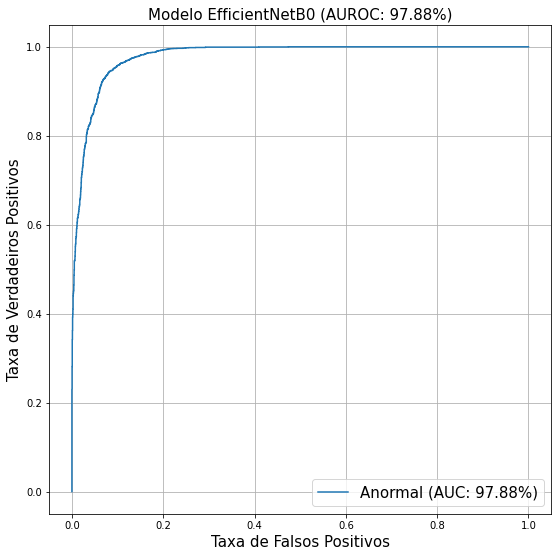

In [28]:
labels_portugues = ['Anormal']
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels_portugues):
    fpr, tpr, thresholds = roc_curve(y_labels_test1[:, idx].astype(int), y_pred1[:, idx])
    c_ax.plot(fpr, tpr, label = '{} (AUC: {:.2f}%)'.format(c_label, auc(fpr, tpr) * 100))
c_ax.legend(fontsize = 15)
c_ax.set_xlabel('Taxa de Falsos Positivos', size = 15)
c_ax.set_ylabel('Taxa de Verdadeiros Positivos', size = 15)
auroc_value = str(roc_auc_score(y_labels_test1.astype(int), y_pred1) * 100)[0:5]
c_ax.set_title('Modelo EfficientNetB0 (AUROC: ' + auroc_value + '%)', size = 15)
c_ax.grid(True)

In [29]:
threshold_variation = dict()
for label_index in range(0, len(labels)):
  threshold_variation[label_index] = list()
  for threshold in range(1, 100):
    y_pred_bin1 = binarize_preds(pred_array = y_pred_val1, column = label_index, 
                                 threshold = threshold)
    matrix = confusion_matrix(y_labels_valid1[:, label_index], y_pred_bin1)
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
    f1_score = (2 * precision * recall) / (precision + recall) 
    threshold_variation[label_index].append(f1_score)

bests_thresholds = list()
for label_index in range(0, len(labels)):
   for threshold in range(1, 100):
     if threshold_variation[label_index][threshold] == np.max(threshold_variation[label_index]):
       bests_thresholds.append(threshold)
       break

In [30]:
for label_index in range(0,1):
  y_pred_bin1 = binarize_preds(pred_array = y_pred1, column = label_index, 
                              threshold = bests_thresholds[label_index])
  matrix = confusion_matrix(y_labels_test2[:, label_index], y_pred_bin1)
  acc = (matrix[0,0] + matrix[1,1])/np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={labels_portugues[label_index]}== \n{matrix},' 
        f' Threshold = {bests_thresholds[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

==Anormal== 
[[2424  241]
 [ 135 2530]], Threshold = 60
Acurácia = 92.94559099437149 % | Precisão = 90.95684803001876 % | 
Sensibilidade = 94.72450175849941 % | F1 Score = 92.80245022970904 %



### DenseNet121

In [ ]:
base_model2 = DenseNet121(include_top = False, weights = 'imagenet', 
                          input_shape = (image_size, image_size, 3))
x = base_model2.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(labels), activation = 'sigmoid')(x)
densenet = tf.keras.Model(base_model2.input, output)
densenet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                 loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0), 
                 metrics = [tf.keras.metrics.AUC(multi_label = True)])

callbacks = get_callbacks(model_name = 'densenet', monitor = 'val_auc')

In [ ]:
layers_name = list()
for layer in base_model2.layers:
  layers_name.append(layer.name)

block_names = ['input_1', 'conv4_block5_0_relu', 'conv5_block4_concat']

for blocks in block_names:
  try:
    layers_name.index(blocks)
    print('Bloco ' + blocks + ' found!')
  except ValueError:
    print('Bloco ' + blocks + ' not found!')

Bloco input_1 found!
Bloco conv4_block5_0_relu found!
Bloco conv5_block4_concat found!


In [ ]:
freeze_layers(conv_base = base_model2, layer_name = block_names[2])
densenet.fit(train_gen2, validation_data = valid_gen2, epochs = 3, 
             callbacks = callbacks, use_multiprocessing = True, 
             workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2528 - auc: 0.9592
Epoch 1: val_auc improved from -inf to 0.95207, saving model to model.densenet.h5
944/944 [==============================] - 920s 938ms/step - loss: 0.2528 - auc: 0.9592 - val_loss: 0.3457 - val_auc: 0.9521
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.2169 - auc: 0.9690
Epoch 2: val_auc improved from 0.95207 to 0.95228, saving model to model.densenet.h5
944/944 [==============================] - 857s 899ms/step - loss: 0.2169 - auc: 0.9690 - val_loss: 0.4015 - val_auc: 0.9523
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.2047 - auc: 0.9721
Epoch 3: val_auc improved from 0.95228 to 0.96327, saving model to model.densenet.h5
944/944 [==============================] - 849s 891ms/step - loss: 0.2047 - auc: 0.9721 - val_loss: 0.2447 - val_auc: 0.9633


In [ ]:
densenet.load_weights('/content/model.densenet.h5')
densenet.save('model_densenet1')
shutil.make_archive(base_name = 'model_densenet1', format = 'zip', 
                    root_dir = '/content/model_densenet1')
shutil.move('/content/model_densenet1.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/DenseNet121')

In [ ]:
freeze_layers(conv_base = base_model2, layer_name = block_names[1])
densenet.fit(train_gen2, validation_data = valid_gen2, epochs = 3, 
             callbacks = callbacks, use_multiprocessing = True, 
             workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1963 - auc: 0.9743
Epoch 1: val_auc did not improve from 0.96327
944/944 [==============================] - 848s 890ms/step - loss: 0.1963 - auc: 0.9743 - val_loss: 0.4856 - val_auc: 0.9309
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1900 - auc: 0.9756
Epoch 2: val_auc improved from 0.96327 to 0.96791, saving model to model.densenet.h5
944/944 [==============================] - 855s 898ms/step - loss: 0.1900 - auc: 0.9756 - val_loss: 0.2440 - val_auc: 0.9679
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1880 - auc: 0.9762
Epoch 3: val_auc improved from 0.96791 to 0.97039, saving model to model.densenet.h5
944/944 [==============================] - 850s 892ms/step - loss: 0.1880 - auc: 0.9762 - val_loss: 0.2380 - val_auc: 0.9704


In [ ]:
densenet.load_weights('/content/model.densenet.h5')
densenet.save('model_densenet2')
shutil.make_archive(base_name = 'model_densenet2', format = 'zip', 
                    root_dir = '/content/model_densenet2')
shutil.move('/content/model_densenet2.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/DenseNet121')

In [ ]:
freeze_layers(conv_base = base_model2, layer_name = block_names[0])
densenet.fit(train_gen2, validation_data = valid_gen2, epochs = 3, 
             callbacks = callbacks, use_multiprocessing = True, 
             workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1816 - auc: 0.9776
Epoch 1: val_auc did not improve from 0.97039
944/944 [==============================] - 852s 895ms/step - loss: 0.1816 - auc: 0.9776 - val_loss: 1.0993 - val_auc: 0.8850
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1775 - auc: 0.9787
Epoch 2: val_auc improved from 0.97039 to 0.97157, saving model to model.densenet.h5
944/944 [==============================] - 861s 904ms/step - loss: 0.1775 - auc: 0.9787 - val_loss: 0.2085 - val_auc: 0.9716
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1718 - auc: 0.9798
Epoch 3: val_auc improved from 0.97157 to 0.97295, saving model to model.densenet.h5
944/944 [==============================] - 850s 894ms/step - loss: 0.1718 - auc: 0.9798 - val_loss: 0.2153 - val_auc: 0.9730


In [ ]:
densenet.load_weights('/content/model.densenet.h5')
densenet.save('model_densenet3')
shutil.make_archive(base_name = 'model_densenet3', format = 'zip', 
                    root_dir = '/content/model_densenet3')
shutil.move('/content/model_densenet3.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/DenseNet121')

In [ ]:
shutil.move('/content/model.densenet.h5', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/DenseNet121')

In [ ]:
y_pred_val2 = densenet.predict(valid_gen2)
y_pred2 = densenet.predict(test_gen2)
print(f'AUC | Dados de Validação = {densenet.evaluate(valid_gen2)[1] * 100} %')
print(f'AUC | Dados de Teste = {densenet.evaluate(test_gen2)[1] * 100} %')

84/84 [==============================] - 94s 1s/step - loss: 0.2153 - auc: 0.9730
AUC | Dados de Validação = 97.29525446891785 %
84/84 [==============================] - 93s 1s/step - loss: 0.1998 - auc: 0.9745
AUC | Dados de Teste = 97.44733572006226 %


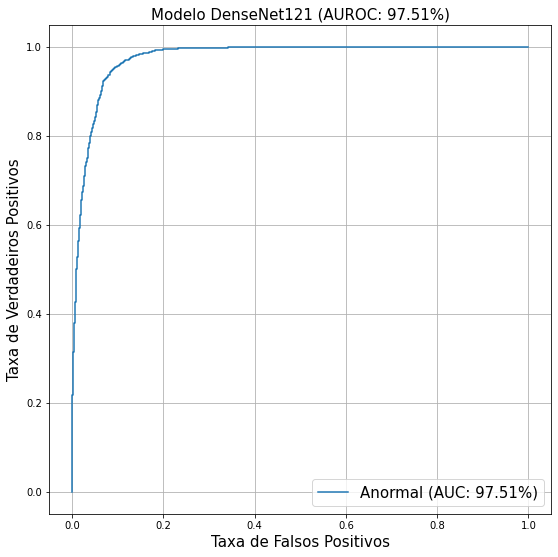

In [ ]:
labels_portugues = ['Anormal']
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels_portugues):
    fpr, tpr, thresholds = roc_curve(y_labels_test2[:, idx].astype(int), y_pred2[:, idx])
    c_ax.plot(fpr, tpr, label = '{} (AUC: {:.2f}%)'.format(c_label, auc(fpr, tpr) * 100))
c_ax.legend(fontsize = 15)
c_ax.set_xlabel('Taxa de Falsos Positivos', size = 15)
c_ax.set_ylabel('Taxa de Verdadeiros Positivos', size = 15)
auroc_value = str(roc_auc_score(y_labels_test2.astype(int), y_pred2) * 100)[0:5]
c_ax.set_title('Modelo DenseNet121 (AUROC: ' + auroc_value + '%)', size = 15)
c_ax.grid(True)

In [ ]:
threshold_variation = dict()
for label_index in range(0, len(labels)):
  threshold_variation[label_index] = list()
  for threshold in range(1, 100):
    y_pred_bin2 = binarize_preds(pred_array = y_pred_val2, column = label_index, 
                                threshold = threshold)
    matrix = confusion_matrix(y_labels_valid2[:, label_index], y_pred_bin2)
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
    f1_score = (2 * precision * recall) / (precision + recall) 
    threshold_variation[label_index].append(f1_score)

bests_thresholds = list()
for label_index in range(0, len(labels)):
   for threshold in range(1, 100):
     if threshold_variation[label_index][threshold] == np.max(threshold_variation[label_index]):
       bests_thresholds.append(threshold)
       break

In [ ]:
for label_index in range(0,1):
  y_pred_bin2 = binarize_preds(pred_array = y_pred2, column = label_index, 
                              threshold = bests_thresholds[label_index])
  matrix = confusion_matrix(y_labels_test2[:, label_index], y_pred_bin2)
  acc = (matrix[0,0] + matrix[1,1])/np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={labels_portugues[label_index]}== \n{matrix},' 
        f' Threshold = {bests_thresholds[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

==Anormal== 
[[2444  221]
 [ 165 2500]], Threshold = 43
Acurácia = 92.75797373358348 % | Precisão = 91.70731707317074 % | 
Sensibilidade = 93.67573783058644 % | F1 Score = 92.68107698141827 %



### InceptionV3

In [ ]:
base_model3 = InceptionV3(include_top = False, weights = 'imagenet', 
                          input_shape = (image_size, image_size, 3))
x = base_model3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(labels), activation = 'sigmoid')(x)
inception = tf.keras.Model(base_model3.input, output)
inception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                  loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0), 
                  metrics = [tf.keras.metrics.AUC(multi_label = True)])

callbacks = get_callbacks(model_name = 'inception', monitor = 'val_auc_1')

In [ ]:
layers_name = list()
for layer in base_model3.layers:
  layers_name.append(layer.name)

block_names = ['input_2', 'batch_normalization_30', 'mixed8']

for blocks in block_names:
  try:
    layers_name.index(blocks)
    print('Bloco ' + blocks + ' found!')
  except ValueError:
    print('Bloco ' + blocks + ' not found!')

Bloco input_2 found!
Bloco batch_normalization_30 found!
Bloco mixed8 found!


In [ ]:
freeze_layers(conv_base = base_model3, layer_name = block_names[2])
inception.fit(train_gen3, validation_data = valid_gen3, epochs = 3, 
              callbacks = callbacks, use_multiprocessing = True, 
              workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2392 - auc_1: 0.9628
Epoch 1: val_auc_1 improved from -inf to 0.94701, saving model to model.inception.h5
944/944 [==============================] - 855s 885ms/step - loss: 0.2392 - auc_1: 0.9628 - val_loss: 0.5021 - val_auc_1: 0.9470
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.2040 - auc_1: 0.9724
Epoch 2: val_auc_1 improved from 0.94701 to 0.96789, saving model to model.inception.h5
944/944 [==============================] - 831s 873ms/step - loss: 0.2040 - auc_1: 0.9724 - val_loss: 0.2732 - val_auc_1: 0.9679
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1923 - auc_1: 0.9752
Epoch 3: val_auc_1 improved from 0.96789 to 0.97099, saving model to model.inception.h5
944/944 [==============================] - 807s 848ms/step - loss: 0.1923 - auc_1: 0.9752 - val_loss: 0.2190 - val_auc_1: 0.9710


In [ ]:
inception.load_weights('/content/model.inception.h5')
inception.save('model_inception1')
shutil.make_archive(base_name = 'model_inception1', format = 'zip', 
                    root_dir = '/content/model_inception1')
shutil.move('/content/model_inception1.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionV3')

In [ ]:
freeze_layers(conv_base = base_model3, layer_name = block_names[1])
inception.fit(train_gen3, validation_data = valid_gen3, epochs = 3, 
              callbacks = callbacks, use_multiprocessing = True, 
              workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1844 - auc_1: 0.9773
Epoch 1: val_auc_1 improved from 0.97099 to 0.97522, saving model to model.inception.h5
944/944 [==============================] - 802s 841ms/step - loss: 0.1844 - auc_1: 0.9773 - val_loss: 0.1938 - val_auc_1: 0.9752
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1788 - auc_1: 0.9785
Epoch 2: val_auc_1 did not improve from 0.97522
944/944 [==============================] - 809s 850ms/step - loss: 0.1788 - auc_1: 0.9785 - val_loss: 0.2532 - val_auc_1: 0.9712
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1722 - auc_1: 0.9802
Epoch 3: val_auc_1 did not improve from 0.97522
944/944 [==============================] - 822s 862ms/step - loss: 0.1722 - auc_1: 0.9802 - val_loss: 0.2299 - val_auc_1: 0.9693


In [ ]:
inception.load_weights('/content/model.inception.h5')
inception.save('model_inception2')
shutil.make_archive(base_name = 'model_inception2', format = 'zip', 
                    root_dir = '/content/model_inception2')
shutil.move('/content/model_inception2.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionV3')

In [ ]:
freeze_layers(conv_base = base_model3, layer_name = block_names[0])
inception.fit(train_gen3, validation_data = valid_gen3, epochs = 3, 
              callbacks = callbacks, use_multiprocessing = True, 
              workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1843 - auc_1: 0.9772
Epoch 1: val_auc_1 did not improve from 0.97522
944/944 [==============================] - 833s 876ms/step - loss: 0.1843 - auc_1: 0.9772 - val_loss: 0.2024 - val_auc_1: 0.9733
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1733 - auc_1: 0.9797
Epoch 2: val_auc_1 did not improve from 0.97522
944/944 [==============================] - 837s 878ms/step - loss: 0.1733 - auc_1: 0.9797 - val_loss: 0.3320 - val_auc_1: 0.9622
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1664 - auc_1: 0.9812
Epoch 3: val_auc_1 did not improve from 0.97522
944/944 [==============================] - 858s 899ms/step - loss: 0.1664 - auc_1: 0.9812 - val_loss: 0.2108 - val_auc_1: 0.9731


In [ ]:
inception.load_weights('/content/model.inception.h5')
inception.save('model_inception3')
shutil.make_archive(base_name = 'model_inception3', format = 'zip', 
                    root_dir = '/content/model_inception3')
shutil.move('/content/model_inception3.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionV3')

In [ ]:
shutil.move('/content/model.inception.h5', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionV3')

In [ ]:
y_pred_val3 = inception.predict(valid_gen3)
y_pred3 = inception.predict(test_gen3)
print(f'AUC | Dados de Validação = {inception.evaluate(valid_gen3)[1] * 100} %')
print(f'AUC | Dados de Teste = {inception.evaluate(test_gen3)[1] * 100} %')

84/84 [==============================] - 94s 1s/step - loss: 0.1938 - auc_1: 0.9752
AUC | Dados de Validação = 97.5221037864685 %
84/84 [==============================] - 94s 1s/step - loss: 0.1909 - auc_1: 0.9757
AUC | Dados de Teste = 97.57161140441895 %


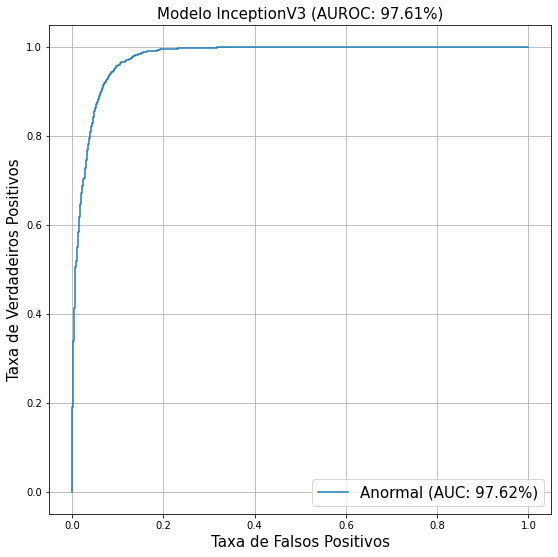

In [ ]:
labels_portugues = ['Anormal']
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels_portugues):
    fpr, tpr, thresholds = roc_curve(y_labels_test3[:, idx].astype(int), y_pred3[:, idx])
    c_ax.plot(fpr, tpr, label = '{} (AUC: {:.2f}%)'.format(c_label, auc(fpr, tpr) * 100))
c_ax.legend(fontsize = 15)
c_ax.set_xlabel('Taxa de Falsos Positivos', size = 15)
c_ax.set_ylabel('Taxa de Verdadeiros Positivos', size = 15)
auroc_value = str(roc_auc_score(y_labels_test3.astype(int), y_pred3) * 100)[0:5]
c_ax.set_title('Modelo InceptionV3 (AUROC: ' + auroc_value + '%)', size = 15)
c_ax.grid(True)

In [ ]:
threshold_variation = dict()
for label_index in range(0, len(labels)):
  threshold_variation[label_index] = list()
  for threshold in range(1, 100):
    y_pred_bin3 = binarize_preds(pred_array = y_pred_val3, column = label_index, 
                                 threshold = threshold)
    matrix = confusion_matrix(y_labels_valid3[:, label_index], y_pred_bin3)
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
    f1_score = (2 * precision * recall) / (precision + recall) 
    threshold_variation[label_index].append(f1_score)

bests_thresholds = list()
for label_index in range(0, len(labels)):
   for threshold in range(1, 100):
     if threshold_variation[label_index][threshold] == np.max(threshold_variation[label_index]):
       bests_thresholds.append(threshold)
       break

In [ ]:
for label_index in range(0,1):
  y_pred_bin3 = binarize_preds(pred_array = y_pred3, column = label_index, 
                               threshold = bests_thresholds[label_index])
  matrix = confusion_matrix(y_labels_test3[:, label_index], y_pred_bin3)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={labels_portugues[label_index]}== \n{matrix},' 
        f' Threshold = {bests_thresholds[label_index]}'
        f'\nAcurácia = {acc*100} % | Precisão = {precision*100} % | '
        f'\nSensibilidade = {recall*100} % | F1 Score = {f1_score*100} %\n')

==Anormal== 
[[2383  282]
 [ 101 2564]], Threshold = 42
Acurácia = 92.81425891181989 % | Precisão = 89.41838649155723 % | 
Sensibilidade = 95.93397745571659 % | F1 Score = 92.56166245872986 %



### Xception

In [ ]:
base_model4 = Xception(include_top = False, weights = 'imagenet', 
                              input_shape = (image_size, image_size, 3))
x = base_model4.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(labels), activation = 'sigmoid')(x)
xception = tf.keras.Model(base_model4.input, output)
xception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                 loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0), 
                 metrics = [tf.keras.metrics.AUC(multi_label = True)])

callbacks = get_callbacks(model_name = 'xception', monitor = 'val_auc_3')

In [ ]:
layers_name = list()
for layer in base_model4.layers:
  layers_name.append(layer.name)

block_names = ['input_4', 'block6_sepconv3_act', 'block11_sepconv3_bn']

for blocks in block_names:
  try:
    layers_name.index(blocks)
    print('Bloco ' + blocks + ' found!')
  except ValueError:
    print('Bloco ' + blocks + ' not found!')

Bloco input_4 found!
Bloco block6_sepconv3_act found!
Bloco block11_sepconv3_bn found!


In [ ]:
freeze_layers(conv_base = base_model4, layer_name = block_names[2])
xception.fit(train_gen4, validation_data = valid_gen4, epochs = 3, 
             callbacks = callbacks, use_multiprocessing = True, 
             workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2228 - auc_3: 0.9677
Epoch 1: val_auc_3 improved from -inf to 0.96821, saving model to model.xception.h5
944/944 [==============================] - 1341s 1s/step - loss: 0.2228 - auc_3: 0.9677 - val_loss: 0.2590 - val_auc_3: 0.9682
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1863 - auc_3: 0.9768
Epoch 2: val_auc_3 did not improve from 0.96821
944/944 [==============================] - 1305s 1s/step - loss: 0.1863 - auc_3: 0.9768 - val_loss: 0.3711 - val_auc_3: 0.9580
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1769 - auc_3: 0.9789
Epoch 3: val_auc_3 improved from 0.96821 to 0.96860, saving model to model.xception.h5
944/944 [==============================] - 1300s 1s/step - loss: 0.1769 - auc_3: 0.9789 - val_loss: 0.2356 - val_auc_3: 0.9686


In [ ]:
xception.load_weights('/content/model.xception.h5')
xception.save('model_xception1')
shutil.make_archive(base_name = 'model_xception1', format = 'zip', 
                    root_dir = '/content/model_xception1')
shutil.move('/content/model_xception1.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/Xception')

In [ ]:
freeze_layers(conv_base = base_model4, layer_name = block_names[1])
xception.fit(train_gen4, validation_data = valid_gen4, epochs = 3, 
             callbacks = callbacks, use_multiprocessing = True, 
             workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1675 - auc_3: 0.9811
Epoch 1: val_auc_3 improved from 0.96860 to 0.97473, saving model to model.xception.h5
944/944 [==============================] - 1306s 1s/step - loss: 0.1675 - auc_3: 0.9811 - val_loss: 0.2095 - val_auc_3: 0.9747
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1594 - auc_3: 0.9828
Epoch 2: val_auc_3 did not improve from 0.97473
944/944 [==============================] - 1318s 1s/step - loss: 0.1594 - auc_3: 0.9828 - val_loss: 0.2774 - val_auc_3: 0.9707
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1520 - auc_3: 0.9845
Epoch 3: val_auc_3 improved from 0.97473 to 0.97671, saving model to model.xception.h5
944/944 [==============================] - 1318s 1s/step - loss: 0.1520 - auc_3: 0.9845 - val_loss: 0.2157 - val_auc_3: 0.9767


In [ ]:
xception.load_weights('/content/model.xception.h5')
xception.save('model_xception2')
shutil.make_archive(base_name = 'model_xception2', format = 'zip', 
                    root_dir = '/content/model_xception2')
shutil.move('/content/model_xception2.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/Xception')

In [ ]:
freeze_layers(conv_base = base_model4, layer_name = block_names[0])
xception.fit(train_gen4, validation_data = valid_gen4, epochs = 3, 
             callbacks = callbacks, use_multiprocessing = True, 
             workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1430 - auc_3: 0.9861
Epoch 1: val_auc_3 did not improve from 0.97671
944/944 [==============================] - 1319s 1s/step - loss: 0.1430 - auc_3: 0.9861 - val_loss: 0.2267 - val_auc_3: 0.9736
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1361 - auc_3: 0.9876
Epoch 2: val_auc_3 did not improve from 0.97671
944/944 [==============================] - 1313s 1s/step - loss: 0.1361 - auc_3: 0.9876 - val_loss: 0.2467 - val_auc_3: 0.9708
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1266 - auc_3: 0.9892
Epoch 3: val_auc_3 did not improve from 0.97671
944/944 [==============================] - 1314s 1s/step - loss: 0.1266 - auc_3: 0.9892 - val_loss: 0.2122 - val_auc_3: 0.9746


In [ ]:
xception.load_weights('/content/model.xception.h5')
xception.save('model_xception3')
shutil.make_archive(base_name = 'model_xception3', format = 'zip', 
                    root_dir = '/content/model_xception3')
shutil.move('/content/model_xception3.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/Xception')

In [ ]:
shutil.move('/content/model.xception.h5', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/Xception')

In [ ]:
y_pred_val4 = xception.predict(valid_gen4)
y_pred4 = xception.predict(test_gen4)
print(f'AUC | Dados de Validação = {xception.evaluate(valid_gen4)[1] * 100} %')
print(f'AUC | Dados de Teste = {xception.evaluate(test_gen4)[1] * 100} %')

84/84 [==============================] - 92s 1s/step - loss: 0.2157 - auc_3: 0.9767
AUC | Dados de Validação = 97.67147302627563 %
84/84 [==============================] - 92s 1s/step - loss: 0.2100 - auc_3: 0.9771
AUC | Dados de Teste = 97.71394729614258 %


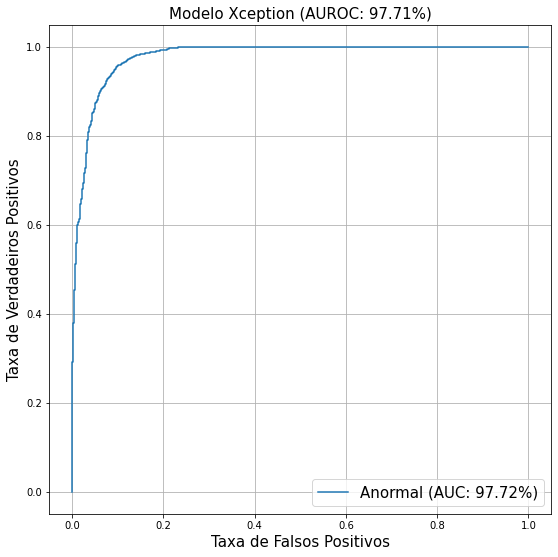

In [ ]:
labels_portugues = ['Anormal']
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels_portugues):
    fpr, tpr, thresholds = roc_curve(y_labels_test4[:, idx].astype(int), y_pred4[:, idx])
    c_ax.plot(fpr, tpr, label = '{} (AUC: {:.2f}%)'.format(c_label, auc(fpr, tpr) * 100))
c_ax.legend(fontsize = 15)
c_ax.set_xlabel('Taxa de Falsos Positivos', size = 15)
c_ax.set_ylabel('Taxa de Verdadeiros Positivos', size = 15)
auroc_value = str(roc_auc_score(y_labels_test4.astype(int), y_pred4)*100)[0:5]
c_ax.set_title('Modelo Xception (AUROC: ' + auroc_value + '%)', size = 15)
c_ax.grid(True)

In [ ]:
threshold_variation = dict()
for label_index in range(0, len(labels)):
  threshold_variation[label_index] = list()
  for threshold in range(1, 100):
    y_pred_bin4 = binarize_preds(pred_array = y_pred_val4, column = label_index, 
                                 threshold = threshold)
    matrix = confusion_matrix(y_labels_valid4[:, label_index], y_pred_bin4)
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
    f1_score = (2 * precision * recall) / (precision + recall) 
    threshold_variation[label_index].append(f1_score)

bests_thresholds = list()
for label_index in range(0, len(labels)):
   for threshold in range(1, 100):
     if threshold_variation[label_index][threshold] == np.max(threshold_variation[label_index]):
       bests_thresholds.append(threshold)
       break

In [ ]:
for label_index in range(0,1):
  y_pred_bin4 = binarize_preds(pred_array = y_pred4, column = label_index, 
                               threshold = bests_thresholds[label_index])
  matrix = confusion_matrix(y_labels_test4[:, label_index], y_pred_bin4)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={labels_portugues[label_index]}== \n{matrix},' 
        f' Threshold = {bests_thresholds[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

==Anormal== 
[[2376  289]
 [ 104 2561]], Threshold = 23
Acurácia = 92.62664165103189 % | Precisão = 89.15572232645404 % | 
Sensibilidade = 95.80645161290322 % | F1 Score = 92.36151603498541 %



### InceptionResNetV2

In [ ]:
base_model5 = InceptionResNetV2(include_top = False, weights = 'imagenet', 
                                input_shape = (image_size, image_size, 3))
x = base_model5.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(labels), activation = 'sigmoid')(x)
inceptionresnet = tf.keras.Model(base_model5.input, output)
inceptionresnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
                        loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0), 
                        metrics = [tf.keras.metrics.AUC(multi_label = True)])

callbacks = get_callbacks(model_name = 'inceptionresnet', monitor = 'val_auc_4')

In [ ]:
layers_name = list()
for layer in base_model5.layers:
  layers_name.append(layer.name)

block_names = ['input_5', 'activation_180', 'batch_normalization_202']

for blocks in block_names:
  try:
    layers_name.index(blocks)
    print('Bloco ' + blocks + ' found!')
  except ValueError:
    print('Bloco ' + blocks + ' not found!')

Bloco input_5 found!
Bloco activation_180 found!
Bloco batch_normalization_202 found!


In [ ]:
freeze_layers(conv_base = base_model5, layer_name = block_names[2])
inceptionresnet.fit(train_gen5, validation_data = valid_gen5, epochs = 3, 
                    callbacks = callbacks, use_multiprocessing = True, 
                    workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2270 - auc_4: 0.9664
Epoch 1: val_auc_4 improved from -inf to 0.96500, saving model to model.inceptionresnet.h5
944/944 [==============================] - 1216s 1s/step - loss: 0.2270 - auc_4: 0.9664 - val_loss: 0.3424 - val_auc_4: 0.9650
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1935 - auc_4: 0.9749
Epoch 2: val_auc_4 improved from 0.96500 to 0.97261, saving model to model.inceptionresnet.h5
944/944 [==============================] - 1158s 1s/step - loss: 0.1935 - auc_4: 0.9749 - val_loss: 0.2378 - val_auc_4: 0.9726
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1820 - auc_4: 0.9777
Epoch 3: val_auc_4 improved from 0.97261 to 0.97402, saving model to model.inceptionresnet.h5
944/944 [==============================] - 1162s 1s/step - loss: 0.1820 - auc_4: 0.9777 - val_loss: 0.1988 - val_auc_4: 0.9740


In [ ]:
inceptionresnet.load_weights('/content/model.inceptionresnet.h5')
inceptionresnet.save('model_inceptionresnet1')
shutil.make_archive(base_name = 'model_inceptionresnet1', format = 'zip', 
                    root_dir = '/content/model_inceptionresnet1')
shutil.move('/content/model_inceptionresnet1.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionResNetV2')

In [ ]:
freeze_layers(conv_base = base_model5, layer_name = block_names[1])
inceptionresnet.fit(train_gen5, validation_data = valid_gen5, epochs = 3, 
                    callbacks = callbacks, use_multiprocessing = True, 
                    workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1732 - auc_4: 0.9797
Epoch 1: val_auc_4 did not improve from 0.97402
944/944 [==============================] - 1188s 1s/step - loss: 0.1732 - auc_4: 0.9797 - val_loss: 0.2193 - val_auc_4: 0.9695
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1675 - auc_4: 0.9811
Epoch 2: val_auc_4 did not improve from 0.97402
944/944 [==============================] - 1178s 1s/step - loss: 0.1675 - auc_4: 0.9811 - val_loss: 0.3080 - val_auc_4: 0.9657
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1582 - auc_4: 0.9831
Epoch 3: val_auc_4 did not improve from 0.97402
944/944 [==============================] - 1180s 1s/step - loss: 0.1582 - auc_4: 0.9831 - val_loss: 0.3736 - val_auc_4: 0.9544


In [ ]:
inceptionresnet.load_weights('/content/model.inceptionresnet.h5')
inceptionresnet.save('model_inceptionresnet2')
shutil.make_archive(base_name = 'model_inceptionresnet2', format = 'zip', 
                    root_dir = '/content/model_inceptionresnet2')
shutil.move('/content/model_inceptionresnet2.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionResNetV2')

In [ ]:
freeze_layers(conv_base = base_model5, layer_name = block_names[0])
inceptionresnet.fit(train_gen5, validation_data = valid_gen5, epochs = 3, 
                    callbacks = callbacks, use_multiprocessing = True, 
                    workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.1813 - auc_4: 0.9779
Epoch 1: val_auc_4 did not improve from 0.97402
944/944 [==============================] - 1181s 1s/step - loss: 0.1813 - auc_4: 0.9779 - val_loss: 0.2337 - val_auc_4: 0.9734
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1685 - auc_4: 0.9808
Epoch 2: val_auc_4 improved from 0.97402 to 0.97475, saving model to model.inceptionresnet.h5
944/944 [==============================] - 1150s 1s/step - loss: 0.1685 - auc_4: 0.9808 - val_loss: 0.2045 - val_auc_4: 0.9747
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1597 - auc_4: 0.9827
Epoch 3: val_auc_4 improved from 0.97475 to 0.97663, saving model to model.inceptionresnet.h5
944/944 [==============================] - 1151s 1s/step - loss: 0.1597 - auc_4: 0.9827 - val_loss: 0.1984 - val_auc_4: 0.9766


In [ ]:
inceptionresnet.load_weights('/content/model.inceptionresnet.h5')
inceptionresnet.save('model_inceptionresnet3')
shutil.make_archive(base_name = 'model_inceptionresnet3', format = 'zip', 
                    root_dir = '/content/model_inceptionresnet3')
shutil.move('/content/model_inceptionresnet3.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionResNetV2')

In [ ]:
shutil.move('/content/model.inceptionresnet.h5', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/InceptionResNetV2')

In [ ]:
y_pred_val5 = inceptionresnet.predict(valid_gen5)
y_pred5 = inceptionresnet.predict(test_gen5)
print(f'AUC | Dados de Validação = {inceptionresnet.evaluate(valid_gen5)[1] * 100} %')
print(f'AUC | Dados de Teste = {inceptionresnet.evaluate(test_gen5)[1] * 100} %')

84/84 [==============================] - 94s 1s/step - loss: 0.1984 - auc_4: 0.9766
AUC | Dados de Validação = 97.66285419464111 %
84/84 [==============================] - 95s 1s/step - loss: 0.1860 - auc_4: 0.9777
AUC | Dados de Teste = 97.7725625038147 %


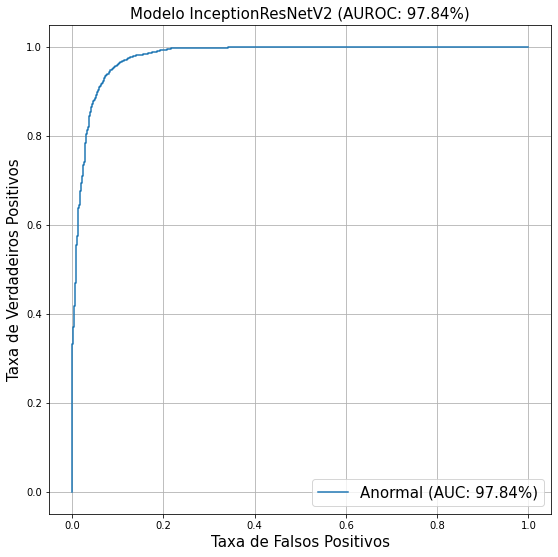

In [ ]:
labels_portugues = ['Anormal']
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels_portugues):
    fpr, tpr, thresholds = roc_curve(y_labels_test5[:, idx].astype(int), y_pred5[:, idx])
    c_ax.plot(fpr, tpr, label = '{} (AUC: {:.2f}%)'.format(c_label, auc(fpr, tpr) * 100))
c_ax.legend(fontsize = 15)
c_ax.set_xlabel('Taxa de Falsos Positivos', size = 15)
c_ax.set_ylabel('Taxa de Verdadeiros Positivos', size = 15)
auroc_value = str(roc_auc_score(y_labels_test5.astype(int), y_pred5)*100)[0:5]
c_ax.set_title('Modelo InceptionResNetV2 (AUROC: ' + auroc_value + '%)', size = 15)
c_ax.grid(True)

In [ ]:
threshold_variation = dict()
for label_index in range(0, len(labels)):
  threshold_variation[label_index] = list()
  for threshold in range(1, 100):
    y_pred_bin5 = binarize_preds(pred_array = y_pred_val5, column = label_index, 
                                 threshold = threshold)
    matrix = confusion_matrix(y_labels_valid5[:, label_index], y_pred_bin5)
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
    f1_score = (2 * precision * recall) / (precision + recall) 
    threshold_variation[label_index].append(f1_score)

bests_thresholds = list()
for label_index in range(0, len(labels)):
   for threshold in range(1, 100):
     if threshold_variation[label_index][threshold] == np.max(threshold_variation[label_index]):
       bests_thresholds.append(threshold)
       break

In [ ]:
for label_index in range(0,1):
  y_pred_bin5 = binarize_preds(pred_array = y_pred5, column = label_index, 
                               threshold = bests_thresholds[label_index])
  matrix = confusion_matrix(y_labels_test5[:, label_index], y_pred_bin5)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={labels_portugues[label_index]}== \n{matrix},' 
        f' Threshold = {bests_thresholds[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

==Anormal== 
[[2406  259]
 [ 115 2550]], Threshold = 35
Acurácia = 92.98311444652909 % | Precisão = 90.28142589118198 % | 
Sensibilidade = 95.4383181277271 % | F1 Score = 92.78827612803703 %



### ResNet101V2

In [ ]:
base_model6 = ResNet101V2(include_top = False, weights = 'imagenet', 
                          input_shape = (image_size, image_size, 3))
x = base_model6.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(len(labels), activation = 'sigmoid')(x)
resnet = tf.keras.Model(base_model6.input, output)
resnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
               loss = tf.keras.losses.BinaryCrossentropy(label_smoothing = 0.0), 
               metrics = [tf.keras.metrics.AUC(multi_label = True)])

callbacks = get_callbacks(model_name = 'resnet', monitor = 'val_auc_5')

In [ ]:
layers_name = list()
for layer in base_model6.layers:
  layers_name.append(layer.name)

block_names = ['input_6', 'conv3_block4_1_conv', 'conv4_block6_3_conv']

for blocks in block_names:
  try:
    layers_name.index(blocks)
    print('Bloco ' + blocks + ' found!')
  except ValueError:
    print('Bloco ' + blocks + ' not found!')

Bloco input_6 found!
Bloco conv3_block4_1_conv found!
Bloco conv4_block6_3_conv found!


In [ ]:
freeze_layers(conv_base = base_model6, layer_name = block_names[2])
resnet.fit(train_gen6, validation_data = valid_gen6, epochs = 3, 
           callbacks = callbacks, use_multiprocessing = True, 
           workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2664 - auc_5: 0.9547
Epoch 1: val_auc_5 improved from -inf to 0.94546, saving model to model.resnet.h5
944/944 [==============================] - 1152s 1s/step - loss: 0.2664 - auc_5: 0.9547 - val_loss: 0.4910 - val_auc_5: 0.9455
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.2298 - auc_5: 0.9651
Epoch 2: val_auc_5 did not improve from 0.94546
944/944 [==============================] - 1094s 1s/step - loss: 0.2298 - auc_5: 0.9651 - val_loss: 0.3342 - val_auc_5: 0.9364
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.2165 - auc_5: 0.9691
Epoch 3: val_auc_5 improved from 0.94546 to 0.96148, saving model to model.resnet.h5
944/944 [==============================] - 1099s 1s/step - loss: 0.2165 - auc_5: 0.9691 - val_loss: 0.2711 - val_auc_5: 0.9615


In [ ]:
resnet.load_weights('/content/model.resnet.h5')
resnet.save('model_resnet1')
shutil.make_archive(base_name = 'model_resnet1', format = 'zip', 
                    root_dir = '/content/model_resnet1')
shutil.move('/content/model_resnet1.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/ResNet101V2')

In [ ]:
freeze_layers(conv_base = base_model6, layer_name = block_names[1])
resnet.fit(train_gen6, validation_data = valid_gen6, epochs = 3, 
           callbacks = callbacks, use_multiprocessing = True, 
           workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2083 - auc_5: 0.9710
Epoch 1: val_auc_5 improved from 0.96148 to 0.96651, saving model to model.resnet.h5
944/944 [==============================] - 1100s 1s/step - loss: 0.2083 - auc_5: 0.9710 - val_loss: 0.2506 - val_auc_5: 0.9665
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.2023 - auc_5: 0.9725
Epoch 2: val_auc_5 did not improve from 0.96651
944/944 [==============================] - 1098s 1s/step - loss: 0.2023 - auc_5: 0.9725 - val_loss: 0.2817 - val_auc_5: 0.9561
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1975 - auc_5: 0.9739
Epoch 3: val_auc_5 did not improve from 0.96651
944/944 [==============================] - 1094s 1s/step - loss: 0.1975 - auc_5: 0.9739 - val_loss: 0.3008 - val_auc_5: 0.9580


In [ ]:
resnet.load_weights('/content/model.resnet.h5')
resnet.save('model_resnet2')
shutil.make_archive(base_name = 'model_resnet2', format = 'zip', 
                    root_dir = '/content/model_resnet2')
shutil.move('/content/model_resnet2.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/ResNet101V2')

In [ ]:
freeze_layers(conv_base = base_model6, layer_name = block_names[0])
resnet.fit(train_gen6, validation_data = valid_gen6, epochs = 3, 
           callbacks = callbacks, use_multiprocessing = True, 
           workers = 8)

Epoch 1/3
944/944 [==============================] - ETA: 0s - loss: 0.2082 - auc_5: 0.9710
Epoch 1: val_auc_5 did not improve from 0.96651
944/944 [==============================] - 1098s 1s/step - loss: 0.2082 - auc_5: 0.9710 - val_loss: 0.2908 - val_auc_5: 0.9605
Epoch 2/3
944/944 [==============================] - ETA: 0s - loss: 0.1991 - auc_5: 0.9732
Epoch 2: val_auc_5 did not improve from 0.96651
944/944 [==============================] - 1092s 1s/step - loss: 0.1991 - auc_5: 0.9732 - val_loss: 0.5747 - val_auc_5: 0.9115
Epoch 3/3
944/944 [==============================] - ETA: 0s - loss: 0.1921 - auc_5: 0.9749
Epoch 3: val_auc_5 did not improve from 0.96651
944/944 [==============================] - 1094s 1s/step - loss: 0.1921 - auc_5: 0.9749 - val_loss: 0.3823 - val_auc_5: 0.9354


In [ ]:
resnet.load_weights('/content/model.resnet.h5')
resnet.save('model_resnet3')
shutil.make_archive(base_name = 'model_resnet3', format = 'zip', 
                    root_dir = '/content/model_resnet3')
shutil.move('/content/model_resnet3.zip', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/ResNet101V2')

In [ ]:
shutil.move('/content/model.resnet.h5', 
            '/content/drive/MyDrive/experimentos-finais-pibic/abnormality_detection/ResNet101V2')

In [ ]:
y_pred_val6 = resnet.predict(valid_gen6)
y_pred6 = resnet.predict(test_gen6)
print(f'AUC | Dados de Validação = {resnet.evaluate(valid_gen6)[1] * 100} %')
print(f'AUC | Dados de Teste = {resnet.evaluate(test_gen6)[1] * 100} %')

84/84 [==============================] - 95s 1s/step - loss: 0.2506 - auc_5: 0.9665
AUC | Dados de Validação = 96.65118455886841 %
84/84 [==============================] - 96s 1s/step - loss: 0.2358 - auc_5: 0.9684
AUC | Dados de Teste = 96.84476852416992 %


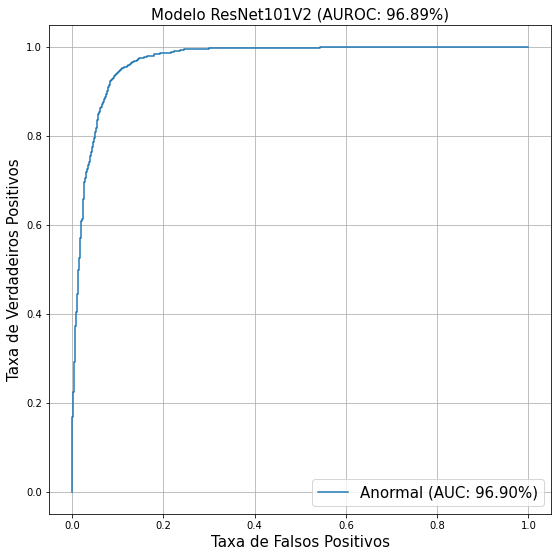

In [ ]:
labels_portugues = ['Anormal']
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels_portugues):
    fpr, tpr, thresholds = roc_curve(y_labels_test6[:, idx].astype(int), y_pred6[:, idx])
    c_ax.plot(fpr, tpr, label = '{} (AUC: {:.2f}%)'.format(c_label, auc(fpr, tpr) * 100))
c_ax.legend(fontsize = 15)
c_ax.set_xlabel('Taxa de Falsos Positivos', size = 15)
c_ax.set_ylabel('Taxa de Verdadeiros Positivos', size = 15)
auroc_value = str(roc_auc_score(y_labels_test6.astype(int), y_pred6)*100)[0:5]
c_ax.set_title('Modelo ResNet101V2 (AUROC: ' + auroc_value + '%)', size = 15)
c_ax.grid(True)

In [ ]:
threshold_variation = dict()
for label_index in range(0, len(labels)):
  threshold_variation[label_index] = list()
  for threshold in range(1, 100):
    y_pred_bin6 = binarize_preds(pred_array = y_pred_val6, column = label_index, 
                                 threshold = threshold)
    matrix = confusion_matrix(y_labels_valid6[:, label_index], y_pred_bin6)
    precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
    f1_score = (2 * precision * recall) / (precision + recall) 
    threshold_variation[label_index].append(f1_score)

bests_thresholds = list()
for label_index in range(0, len(labels)):
   for threshold in range(1, 100):
     if threshold_variation[label_index][threshold] == np.max(threshold_variation[label_index]):
       bests_thresholds.append(threshold)
       break

In [ ]:
for label_index in range(0,1):
  y_pred_bin6 = binarize_preds(pred_array = y_pred6, column = label_index, 
                              threshold = bests_thresholds[label_index])
  matrix = confusion_matrix(y_labels_test6[:, label_index], y_pred_bin6)
  acc = (matrix[0,0] + matrix[1,1]) / np.sum(matrix)
  precision = matrix[0,0] / (matrix[0,0] + matrix[0,1])
  recall = matrix[0,0] / (matrix[0,0] + matrix[1,0])
  f1_score = (2 * precision * recall) / (precision + recall) 
  print(f'=={labels_portugues[label_index]}== \n{matrix},' 
        f' Threshold = {bests_thresholds[label_index]}'
        f'\nAcurácia = {acc * 100} % | Precisão = {precision * 100} % | '
        f'\nSensibilidade = {recall * 100} % | F1 Score = {f1_score * 100} %\n')

==Anormal== 
[[2371  294]
 [ 128 2537]], Threshold = 25
Acurácia = 92.08255159474672 % | Precisão = 88.96810506566604 % | 
Sensibilidade = 94.87795118047218 % | F1 Score = 91.82804027885359 %



### Análise Geral dos Modelos

In [37]:
y_pred1 = efficientnet.predict(test_gen1)
y_pred2 = densenet.predict(test_gen2)
y_pred3 = inception.predict(test_gen3)
y_pred4 = xception.predict(test_gen4)
y_pred5 = inceptionresnet.predict(test_gen5)
y_pred6 = resnet.predict(test_gen6)

In [45]:
y_pred = np.concatenate((y_pred1, y_pred5, y_pred4, y_pred3, y_pred2, y_pred6),
                         axis = 1)
y_labels_test_all = np.concatenate((y_labels_test1, y_labels_test5, y_labels_test4,
                                    y_labels_test3, y_labels_test2, y_labels_test6), 
                                    axis = 1)

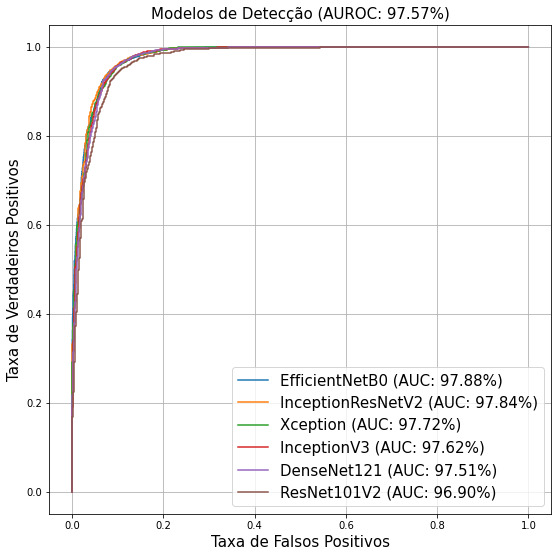

In [46]:
labels_portugues = ['EfficientNetB0', 'InceptionResNetV2', 'Xception', 
                    'InceptionV3', 'DenseNet121', 'ResNet101V2']
fig, c_ax = plt.subplots(1, 1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels_portugues):
    fpr, tpr, thresholds = roc_curve(y_labels_test_all[:, idx].astype(int), y_pred[:, idx])
    c_ax.plot(fpr, tpr, label = '{} (AUC: {:.2f}%)'.format(c_label, auc(fpr, tpr) * 100))
c_ax.legend(fontsize = 15)
c_ax.set_xlabel('Taxa de Falsos Positivos', size = 15)
c_ax.set_ylabel('Taxa de Verdadeiros Positivos', size = 15)
auroc_value = str(roc_auc_score(y_labels_test_all.astype(int), y_pred)*100)[0:5]
c_ax.set_title('Modelos de Detecção (AUROC: ' + auroc_value + '%)', size = 15)
c_ax.grid(True)